In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [112]:
# retreive df - for this notebook, day-wise data must be fed
df = pd.read_csv(r'C:\Users\kylea\Documents\trade_bot\reenforcement_learning\ETH_1d.csv')
df['ds'] = pd.to_datetime(df['Opentime_ISO']).dt.date
df = df.loc[:, ['ds', 'Close']]
df.rename(columns={'Close': 'y'}, inplace=True)
df.head()

,ds,y
0,2019-11-14,180.00
1,2019-11-15,182.37
2,2019-11-16,183.82
3,2019-11-17,178.20
4,2019-11-18,175.94


In [113]:
# split into train and test
print(len(df), 'Days in full df')
# lets try the whole ding - testing last week
tmbf = -(len(df))
train_df = df.iloc[tmbf:]
test_df = df.iloc[-1:]
train_df.tail()

730 Days in full df


,ds,y
725,2021-11-08,4732.33
726,2021-11-09,4628.78
727,2021-11-10,4719.00
728,2021-11-11,4665.46
729,2021-11-12,4689.03


In [114]:
m = Prophet(yearly_seasonality=True)
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [118]:
# this line is why day-wise is required - to use splits, we need to create our own 'future' df with minute/hour splits
future = m.make_future_dataframe(periods=14)
print(future)

            ds
0   2019-11-14
1   2019-11-15
2   2019-11-16
3   2019-11-17
4   2019-11-18
..         ...
739 2021-11-22
740 2021-11-23
741 2021-11-24
742 2021-11-25
743 2021-11-26

[744 rows x 1 columns]


In [119]:
forecast = m.predict(future)
key_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
key_forecast.tail()

,ds,yhat,yhat_lower,yhat_upper
739,2021-11-22,4509.656562,4254.231455,4759.769968
740,2021-11-23,4533.065321,4271.086526,4796.177164
741,2021-11-24,4545.781392,4281.112358,4817.284682
742,2021-11-25,4555.972077,4279.555579,4817.550587
743,2021-11-26,4570.429550,4282.751466,4840.501981


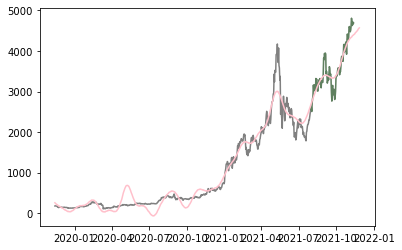

In [120]:
# and plot prediction against actual
plt.plot(train_df['ds'], train_df['y'], color='grey')
plt.plot(test_df['ds'], test_df['y'], color='blue')
plt.plot(df['ds'].iloc[-105:], df['y'].iloc[-105:], color='green', alpha=.25)
plt.plot(key_forecast['ds'], key_forecast['yhat'], color='pink')

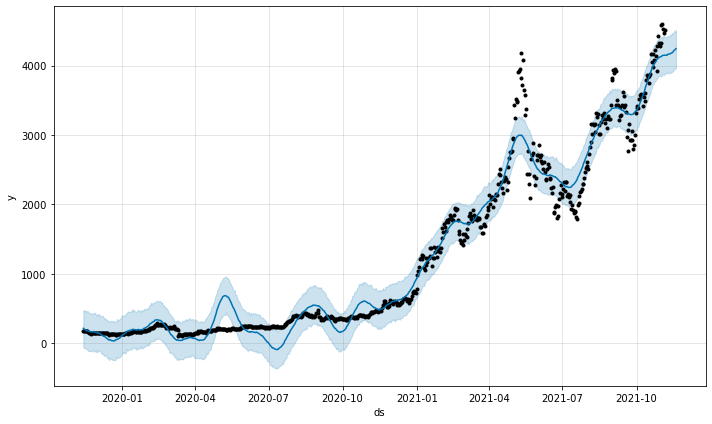

In [98]:
fig1 = m.plot(forecast)

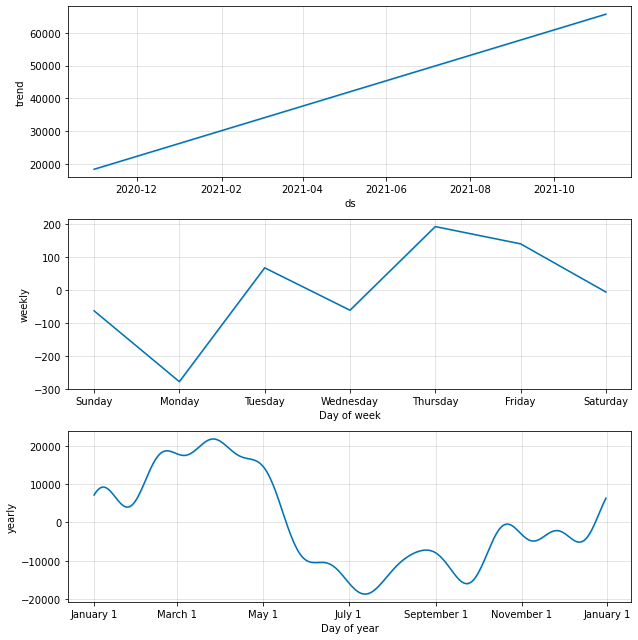

In [64]:
fig2 = m.plot_components(forecast)

In [65]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [ ]:
plot_components_plotly(m, forecast)